<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/Pr%C3%A1tica_Distribuic%CC%A7o%CC%83es_Conti%CC%81nuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

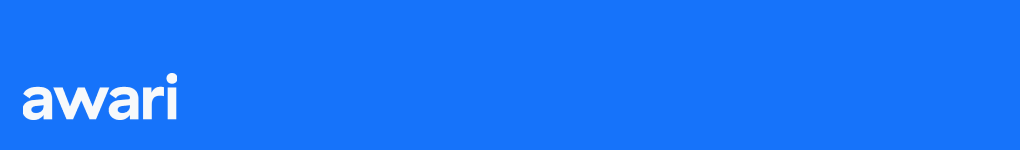

Prática da **Aula 10: Estatística Inferencial II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Distribuições Contínuas**

## **Objetivo**

Nesta prática, vamos ver sobre Distribuições Contínuas em Estatística. Trataremos de:

* Distribuição normal ou gaussiana;
* Distribuição contínua exponencial; e
* Teste de normalidade.

## **Prática**

Vamos iniciar a prática. Durante a aula, os conceitos e técnicos serão explicados com mais detalhes.

In [ ]:
# Importando bibliotecas
import numpy as np # Cálculo numérico
import seaborn as sns # Gráficos
from scipy import stats # Complementa Numpy em cálculo numérico

### **Distribuição normal ou Gaussiana**

#### **Exemplo 1**

Geraremos amostras randômicas contínuas. Usaremos a função [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), de uma outra biblioteca, chamada [Scipy](https://scipy.org/) (*Scientific Python*), para isso:

In [ ]:
# Gerando uma amostra aleatória normalizada
dados_normal = stats.norm.rvs(size=1000)

Vericando a variável:

In [ ]:
type(dados_normal)

numpy.ndarray

Verificando o intervalo gerado:

In [ ]:
dados_normal.min(), dados_normal.max()

(-3.682622334641611, 3.1016275181406145)

Para visualizarmos a curva de distribuição, utilizamos a opção `kde = True`. KDE é a sigla para *Kernel Density Estimation* ou [Estimativa de Densidade do Kernel](https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel).

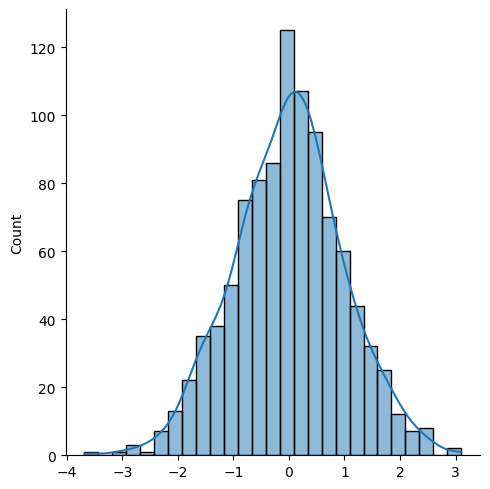

In [ ]:
# Plotando gráfico de distribuição com a curva KDE
sns.displot(dados_normal, kde=True);

Agora, vamos avaliar algumas medidas de tendência central:

In [ ]:
# Média
dados_normal.mean()

-0.0037206342137865106

In [ ]:
# Mediana
np.median(dados_normal)

0.020894518894041328

In [ ]:
# Variância da amostra
np.var(dados_normal)

0.9639870546350641

In [ ]:
# Desvio padrão
np.std(dados_normal)

0.9818284242346338

Em seguida, iremos conferir a centralidade dos dados:

In [ ]:
# Dados do lado direito
direita = np.sum(((dados_normal >= 0.9888061094258027) & (dados_normal <= 0.9888061094258027 + 1)))

In [ ]:
# Dados do lado esquerdo
esquerda = np.sum(((dados_normal <= 0.9888061094258027) & (dados_normal >= 0.9888061094258027 -1)))

In [ ]:
# O quanto os dados estão centrados
centralidade = (direita + esquerda) / 1000 * 100
print("Os dados estão com uma centralidade de " + str(centralidade) + "%")

Os dados estão com uma centralidade de 49.0%


#### **Exemplo 2**

Aqui, vamos usar uma amostra composta por um *array* que contém a altura de diversas observações:

In [ ]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [ ]:
# Conferindo o tamanho da amostra
len(dados)

100

In [ ]:
# Valores mínimos e máximos
min(dados), max(dados)

(126.0, 192.5)

In [ ]:
# Média
dados.mean()

159.25

In [ ]:
# Mediana
np.median(dados)

159.25

In [ ]:
# Moda
stats.mode(dados)

ModeResult(mode=157.5, count=10)

In [ ]:
# Variância da amostra
np.var(dados)

186.3225

In [ ]:
# Desvio padrão
np.std(dados)

13.65

Visualizando e analisando a distribução em um histograma, com a curva KDE:

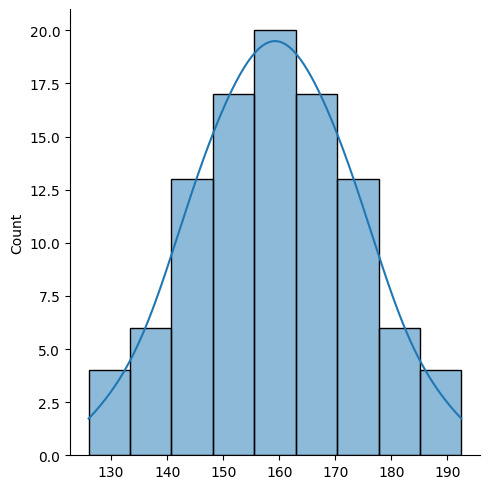

In [ ]:
# Plotando gráfico com as curvas
sns.displot(dados, kde=True);

### **Distribuição Contínua Exponencial**

Para este exemplo, vamos usar `expon` da biblioteca Scipy:

In [ ]:
# Importando expon
from scipy.stats import expon

In [ ]:
# Gerando amostra aleatória contínua exponencial
dados_expon = expon.rvs(size=1000)

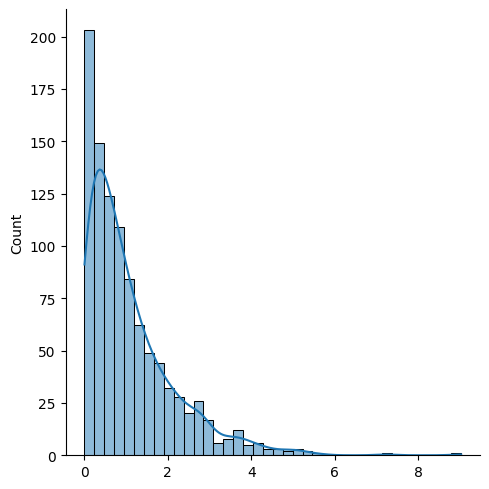

In [ ]:
# Plotando a distribuição com a curva KDE
sns.displot(dados_expon, kde=True);

### **Teste de normalidade e gráfico QQ**

Aqui, é importante sabermos o seguinte:

- **Estatística paramétrica:** os dados estão em alguma distribuição, geralmente a distribuição normal.
- **Estatística não paramétrica:** os dados estão em outra distribuição (ou desconhecida).

Se os dados são **"normais"**, usamos estatísticas **paramétricas**. Caso contrário, usamos estatística não paramétrica.

Vamos gerar agora uma **curva normal** e uma **não normal**, utilizando Scipy com `norm` e `skewnorm` para entendermos isso:

In [ ]:
# Importanto norm e skewnorm
from scipy.stats import skewnorm
from scipy.stats import norm

In [ ]:
# Gerando amostra com distribuição normal
dados_normais = norm.rvs(size=1000)

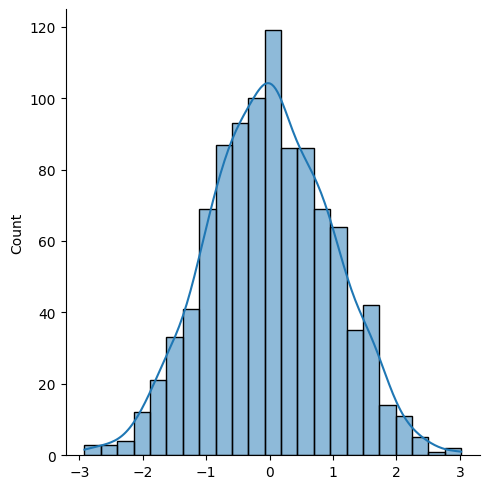

In [ ]:
# Analisando a distribuição da amostra normal
sns.displot(dados_normais, kde=True)

In [ ]:
# Gerando amostra com dados distribuídos de forma não normalizada
dados_naoNormais = skewnorm.rvs(a=10, size=1000)

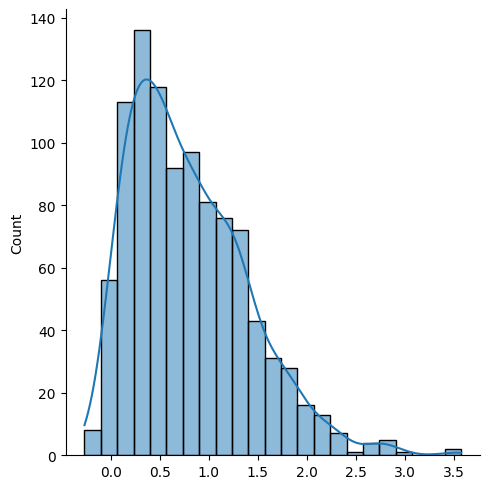

In [ ]:
# analisando a distribuição da amostra NÃO normal
sns.displot(dados_naoNormais, kde=True);

#### **Quantile-quantile plot ou Gráfico QQ**

In [ ]:
# Importando qqplot
from statsmodels.graphics.gofplots import qqplot

Analisando as curvas do gráfico QQ para a amostra normal:

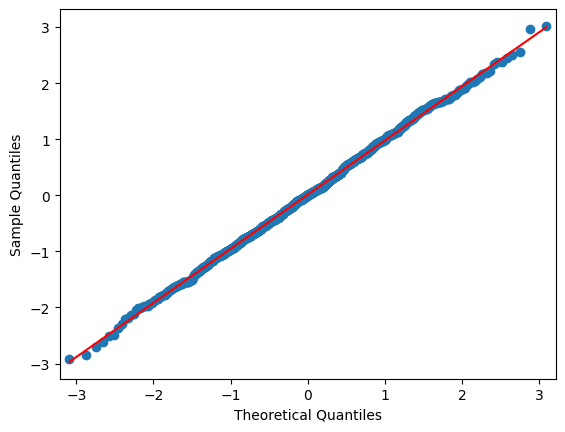

In [ ]:
qqplot(dados_normais, line='s');


Analisando as curvas do gráfico QQ para a amostra não normal:

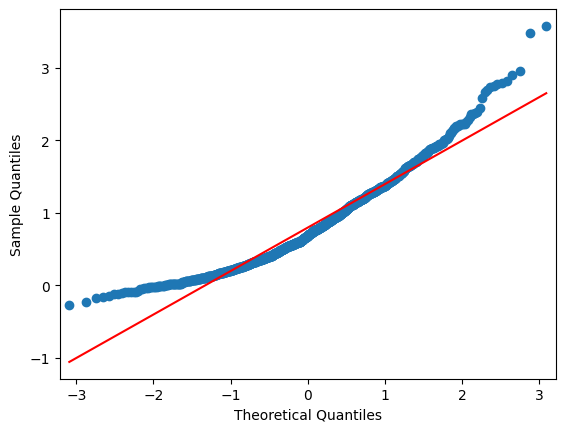

In [ ]:
qqplot(dados_naoNormais, line='s');

## **Sugestões ao instrutor e aos alunos**

Caso seja viável no tempo de aula, o instrutor por abordar mais exemplos ou deter-se melhor sobre os casos tratados aqui.

Aos alunos, cabe lembrar que as mesmas análises feitas aqui podem ser aplicadas a outros datasets, como o do nafrágio do Titanic, por exemplo. Com isso, é possível ver que tipo de distribuição que determinadas variáveis seguem e aplicar análises mais refinadas a partir disso.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**